In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB


In [3]:
df = pd.read_csv('Batsman_All - Copy.csv')
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,hundred,fifty,zero,four,six
0,Abdur Razzak,2004-2014,153,97,39,779,53,13.43,1020,76.37,0,1,12,55,21
1,Abul Hasan,2012-2018,7,3,0,11,7,3.66,16,68.75,0,0,0,1,0
2,Abu Hider,2018-2018,2,1,0,1,1,1.00,11,9.09,0,0,0,0,0
3,Afif Hossain,2020-2020,1,1,0,7,7,7.00,4,175.00,0,0,0,1,0
4,Aftab Ahmed,2004-2010,85,85,6,1954,92,24.73,2353,83.04,0,14,8,205,49


In [4]:
df.describe()

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,hundred,fifty,zero,four,six
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,32.343750,27.492188,4.453125,545.921875,41.562500,14.623828,779.023438,56.101484,0.445312,2.812500,2.804688,50.398438,6.382812
std,47.795074,42.373479,7.804561,1163.277779,41.087912,10.946962,1509.440140,29.623658,1.663923,7.525024,3.853741,111.148432,15.194861
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,0.000000,11.750000,8.000000,5.045000,24.000000,37.942500,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,10.000000,1.000000,74.000000,26.500000,13.355000,134.500000,55.690000,0.000000,0.000000,1.000000,6.000000,0.000000
75%,39.500000,30.250000,5.000000,499.000000,62.250000,22.402500,752.500000,71.277500,0.000000,2.000000,4.000000,46.500000,4.250000
max,218.000000,205.000000,42.000000,7202.000000,176.000000,42.000000,9153.000000,175.000000,13.000000,47.000000,18.000000,783.000000,91.000000


In [5]:
df['rating'] = df['Runs'] / df['Inns'] + df['Runs'] / df['BF'] + df['hundred'] + df['fifty'] / df['Inns'] + df['four']*4 / df['Inns']

In [6]:
df['rating'] = df['Runs'] / df['Inns'] + df['Runs'] / df['BF'] + df['hundred'] + df['fifty'] / df['Inns'] + df['four']*4 / df['Inns'] + df['six']*6 / df['Inns']+ df['zero']/ df['Inns']

In [8]:
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,hundred,fifty,zero,four,six,rating
0,Abdur Razzak,2004-2014,153,97,39,779,53,13.43,1020,76.37,0,1,12,55,21,12.495684
1,Abul Hasan,2012-2018,7,3,0,11,7,3.66,16,68.75,0,0,0,1,0,5.687500
2,Abu Hider,2018-2018,2,1,0,1,1,1.00,11,9.09,0,0,0,0,0,1.090909
3,Afif Hossain,2020-2020,1,1,0,7,7,7.00,4,175.00,0,0,0,1,0,12.750000
4,Aftab Ahmed,2004-2010,85,85,6,1954,92,24.73,2353,83.04,0,14,8,205,49,37.183370


In [10]:
df['res'] = df['rating'].apply(lambda x: '1' if x >= 20 else '0')

In [11]:
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,hundred,fifty,zero,four,six,rating,res
0,Abdur Razzak,2004-2014,153,97,39,779,53,13.43,1020,76.37,0,1,12,55,21,12.495684,0
1,Abul Hasan,2012-2018,7,3,0,11,7,3.66,16,68.75,0,0,0,1,0,5.687500,0
2,Abu Hider,2018-2018,2,1,0,1,1,1.00,11,9.09,0,0,0,0,0,1.090909,0
3,Afif Hossain,2020-2020,1,1,0,7,7,7.00,4,175.00,0,0,0,1,0,12.750000,0
4,Aftab Ahmed,2004-2010,85,85,6,1954,92,24.73,2353,83.04,0,14,8,205,49,37.183370,1


In [12]:
target=df.res
inputs=df.drop(['res','Player','Span','rating'],axis='columns')

In [25]:
X_train, X_test, y_train, y_test= train_test_split(inputs,target,test_size=0.3)

In [22]:
model = GaussianNB()

In [23]:
model.fit(X_train, y_train)

GaussianNB()

In [26]:
model.score(X_test, y_test)

0.8717948717948718

In [27]:
y_test[:5]

35    1
8     0
62    1
47    1
75    0
Name: res, dtype: object

In [28]:
model.predict(X_test[:5])

array(['1', '0', '1', '1', '0'], dtype='<U1')

In [29]:
model.predict_proba(X_test[:10])

array([[1.14621351e-10, 1.00000000e+00],
       [1.00000000e+00, 5.57612199e-12],
       [0.00000000e+00, 1.00000000e+00],
       [8.63852772e-05, 9.99913615e-01],
       [9.99999994e-01, 6.18061362e-09],
       [1.00000000e+00, 3.91300791e-10],
       [0.00000000e+00, 1.00000000e+00],
       [9.98645031e-01, 1.35496883e-03],
       [9.99999999e-01, 5.69683211e-10],
       [0.00000000e+00, 1.00000000e+00]])

In [30]:
from sklearn.model_selection import cross_val_score
cross_val_score(GaussianNB(),X_train, y_train, cv=5)

array([0.77777778, 0.88888889, 0.77777778, 0.88888889, 0.88235294])

In [31]:
dm = pd.read_csv('Batsman_Current - Copy.csv')

In [32]:
dm['rating'] = dm['Runs'] / dm['Inns'] + dm['Runs'] / dm['BF'] + dm['hundred'] + dm['fifty'] / dm['Inns'] + dm['four']*4 / dm['Inns'] + dm['six']*6 / dm['Inns']+ df['zero'] / df['Inns']

In [33]:
p=dm.drop(['Player','Span','rating'],axis='columns')

In [34]:
dm.head(10)

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,hundred,fifty,zero,four,six,rating
0,Afif Hossain,2020-2020,1,1,0,7,7,7.00,4,175.00,0,0,0,1,0,12.873711
1,Al-Amin Hossain,2014-2020,15,7,5,4,2,2.00,20,20.00,0,0,2,0,0,0.771429
2,Anamul Haque,2012-2019,38,52,0,1052,120,30.05,1488,70.69,3,3,6,103,19,34.110835
3,Liton Das,2015-2020,36,36,3,1079,176,32.69,1133,95.23,3,3,4,113,22,50.230117
4,Mahmudullah,2007-2020,188,163,42,4070,128,33.63,5311,76.63,3,21,8,317,57,38.835912
5,Mashrafe Mortaza,2001-2020,218,156,28,1773,51,13.85,2021,87.72,0,1,15,150,62,18.479853
6,Mehidy Hasan Miraz,2017-2020,41,26,4,393,51,17.86,508,77.36,0,1,0,39,4,22.918727
7,Mohammad Mithun,2014-2020,27,23,3,575,63,28.75,718,80.08,0,5,1,49,14,38.267898
8,Mohammad Saifuddin,2017-2020,22,13,4,290,51,32.22,337,86.05,0,2,1,24,6,33.761633
9,Mosaddek Hossain,2016-2019,35,30,10,549,52,27.45,633,86.72,0,2,1,53,11,28.707528


In [35]:
model.predict(p[:10])

array(['0', '0', '1', '1', '1', '1', '0', '1', '1', '1'], dtype='<U1')

In [36]:
pre = dm['rating'].apply(lambda x: '1' if x >= 20 else '0')

In [37]:
pre.head(10)

0    0
1    0
2    1
3    1
4    1
5    0
6    1
7    1
8    1
9    1
Name: rating, dtype: object

In [38]:
s=dm.sort_values(by='rating', ascending=False)

In [39]:
s.head(6)

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,hundred,fifty,zero,four,six,rating
19,Tamim Iqbal,2007-2020,207,205,9,7202,158,36.74,9153,78.68,13,47,18,783,91,67.339285
16,Shakib Al Hasan,2006-2019,206,194,27,6323,134,37.86,7641,82.75,9,47,10,574,42,55.887491
17,Soumya Sarkar,2014-2019,55,54,3,1728,127,33.88,1753,98.57,2,11,5,200,42,54.828819
10,Mushfiqur Rahim,2006-2020,218,204,34,6174,144,36.31,7794,79.21,7,38,10,492,82,50.430157
3,Liton Das,2015-2020,36,36,3,1079,176,32.69,1133,95.23,3,3,4,113,22,50.230117
4,Mahmudullah,2007-2020,188,163,42,4070,128,33.63,5311,76.63,3,21,8,317,57,38.835912


In [40]:
k=s.Player

In [41]:
k.head(6)

19        Tamim Iqbal
16    Shakib Al Hasan
17      Soumya Sarkar
10    Mushfiqur Rahim
3           Liton Das
4         Mahmudullah
Name: Player, dtype: object

Automatically created module for IPython interactive environment


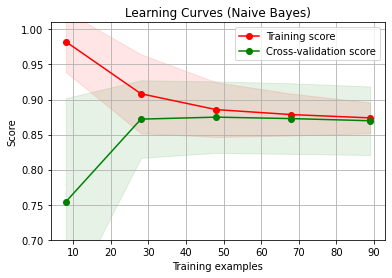

In [1]:
print(__doc__)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


df = df = pd.read_csv('Batsman_All.csv.')


X=df.drop(['res','Player','Span'],axis='columns')
y=df.res

title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.3, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

plt.show()